<a href="https://colab.research.google.com/github/zhaojin-2001/MMO/blob/main/lab2_MMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Экспериментальное введение и требования**

**Цель лабораторной работы:** изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

**Требования к отчету:**
Отчет по лабораторной работе должен содержать:

1.   титульный лист;
2.   описание задания;
3.   текст программы;
4.   экранные формы с примерами выполнения программы.

**Задание:**
1.   Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.
2.   Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
*   устранение пропусков в данных;
*   кодирование категориальных признаков;
*   нормализация числовых признаков.



# **Импорт библиотеки и загрузка набора данных**

В этом эксперименте был выбран набор данных «Титаника», содержащий различную информацию о пассажирах, такую ​​как статус выживания (survived), категория пассажира (pclass), пол (sex), возраст (age), цена билета (fare), порт посадки (embarked) и т. д. Этот набор данных содержит как числовые, так и категориальные характеристики, а также имеет некоторые пропущенные значения, что очень подходит для нужд этого эксперимента.

Мы использовали библиотеку Python pandas для загрузки набора данных и просмотра базовой структуры данных, включая количество строк, столбцов и типы данных каждого столбца. Мы можем понять распределение числовых характеристик с помощью описательной статистики, такой как среднее значение, стандартное отклонение, минимальное значение, максимальное значение и т. д. В то же время мы также проверили, были ли пропущенные значения в наборе данных, и подсчитали количество и долю пропущенных значений для каждого признака, чтобы обеспечить основу для последующей обработки пропущенных значений.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 使用seaborn库加载数据集
titanic_data = sns.load_dataset('titanic')

# 查看数据集基本信息
print("Основная информация о наборе данных:")
print(titanic_data.info())
print("\nОписательная статистика набора данных:")
print(titanic_data.describe())
print("\nСитуация с отсутствующим значением:")
print(titanic_data.isnull().sum())

Основная информация о наборе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Описательная статистика набора данны

# **устранение пропусков в данных**

В наборе данных «Титаника» три признака — age, deck и embarked — имеют отсутствующие значения. Число пропущенных значений для характеристики возраста относительно велико, в то время как число пропущенных значений для каюты и порта посадки относительно мало.

Признак “age” является числовым и имеет большое количество пропущенных значений, поэтому мы воспользуемся методом медианного заполнения. Медиана хорошо отражает возраст большинства пассажиров.

In [ ]:
# 保存填补前的数据副本
titanic_data_original = titanic_data.copy()

In [ ]:
# 用中位数填充年龄缺失值
age_median = titanic_data['age'].median()
titanic_data['age'] = titanic_data['age'].fillna(age_median)

“Deck” — это категориальный признак со многими пропущенными значениями, поэтому для заполнения пропущенных значений используется “Unknown”.Однако тип Categorical в Pandas ограничен, и новые категории нельзя добавлять напрямую. Поэтому мы сначала преобразуем столбец deck в обычный строковый тип (объект), а затем выполняем операцию заполнения.

In [ ]:
# 将 'deck' 列从 Categorical 转换为 object 类型
titanic_data['deck'] = titanic_data['deck'].astype(object)

# 用 'Unknown' 填充 'deck' 列的缺失值
titanic_data['deck'] = titanic_data['deck'].fillna('Unknown')

Порт посадки — это категориальный признак с несколькими пропущенными значениями. Из полученных данных следует, что портом посадки большинства пассажиров является «S» (Southampton), поэтому отсутствующие значения .заполняются модой «S».Для embark_town мы также используем метод большинства.

In [ ]:
# 用众数填充登船港口（embarked和embark_town）缺失值
titanic_data['embarked'] = titanic_data['embarked'].fillna('S')
titanic_data['embark_town'] = titanic_data['embark_town'].fillna(titanic_data['embark_town'].mode()[0])

Давайте проверим случай пропущенных значений.

In [ ]:
# 验证缺失值处理结果
print(titanic_data.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


Затем мы визуализируем результаты.

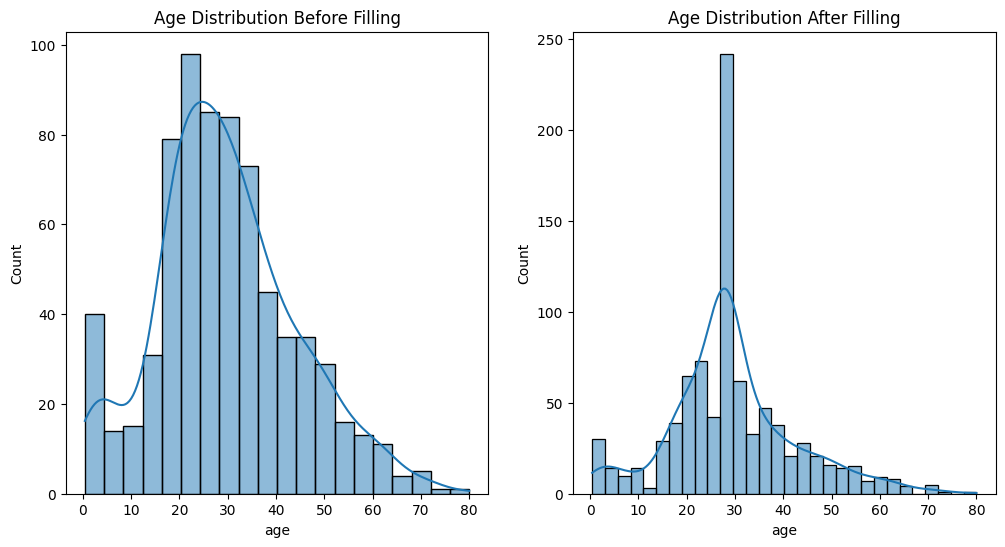

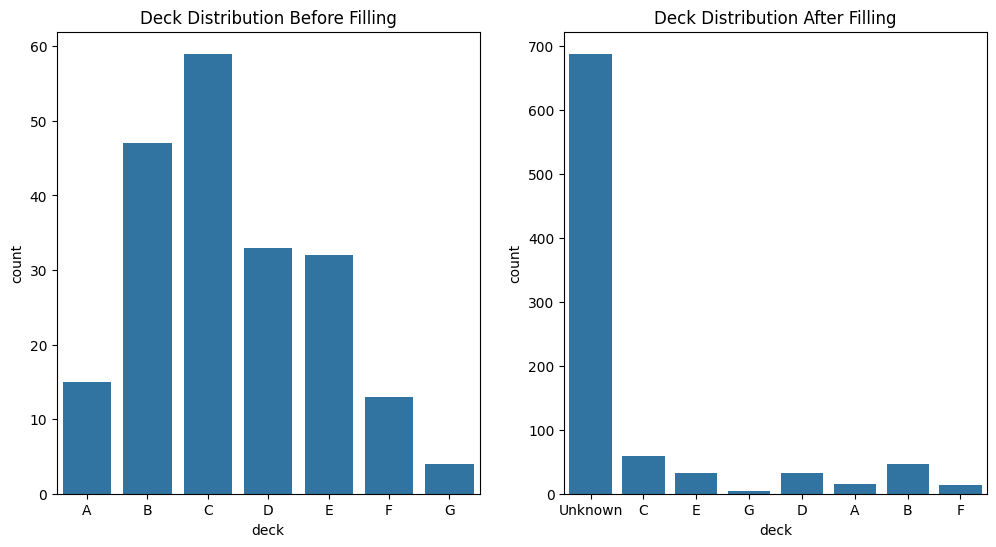

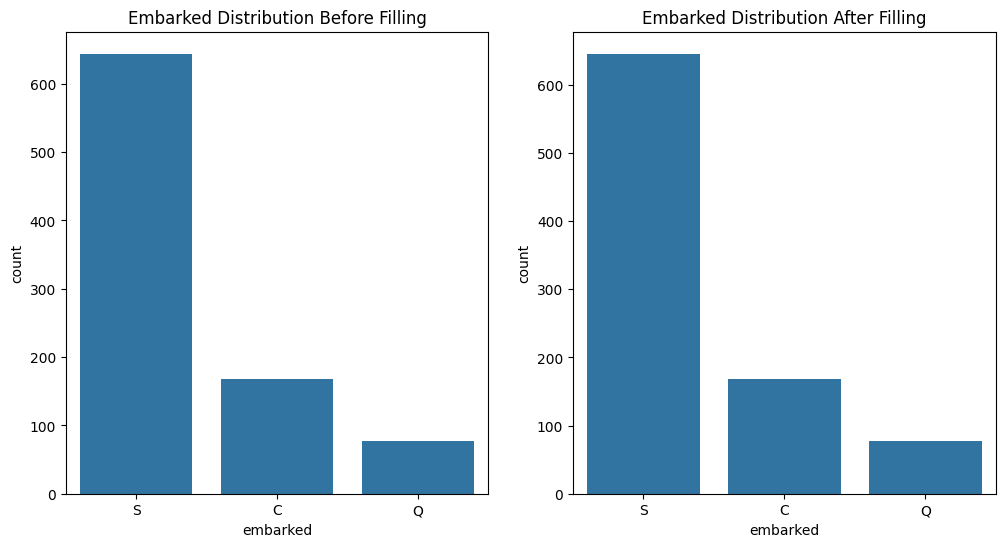

In [ ]:
# 可视化填补前后数据分布的差异

# 年龄分布
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(titanic_data_original['age'].dropna(), kde=True)
plt.title('Age Distribution Before Filling')

plt.subplot(1, 2, 2)
sns.histplot(titanic_data['age'], kde=True)
plt.title('Age Distribution After Filling')
plt.show()

# 甲板分布
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=titanic_data_original['deck'].dropna())
plt.title('Deck Distribution Before Filling')

plt.subplot(1, 2, 2)
sns.countplot(x=titanic_data['deck'])
plt.title('Deck Distribution After Filling')
plt.show()

# 登船港口分布
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=titanic_data_original['embarked'].dropna())
plt.title('Embarked Distribution Before Filling')

plt.subplot(1, 2, 2)
sns.countplot(x=titanic_data['embarked'])
plt.title('Embarked Distribution After Filling')
plt.show()

# **нормализация числовых признаков**

Преобразование Бокса-Кокса данных о возрасте пассажиров "Титаника

In [ ]:
from scipy.stats import boxcox

# 对 'Age' 列进行 Box-Cox 变换
titanic_data['age_boxcox'], lambda_value = boxcox(titanic_data['age'])
print(f"Box-Cox 变换的 lambda 参数: {lambda_value}")

Box-Cox 变换的 lambda 参数: 0.796453129010849


Давайте проверим нормализованные числовые характеристики.

In [ ]:
print(titanic_data[['age', 'fare']].mean())
print(titanic_data[['age', 'fare']].std())

Затем мы визуализируем результаты.

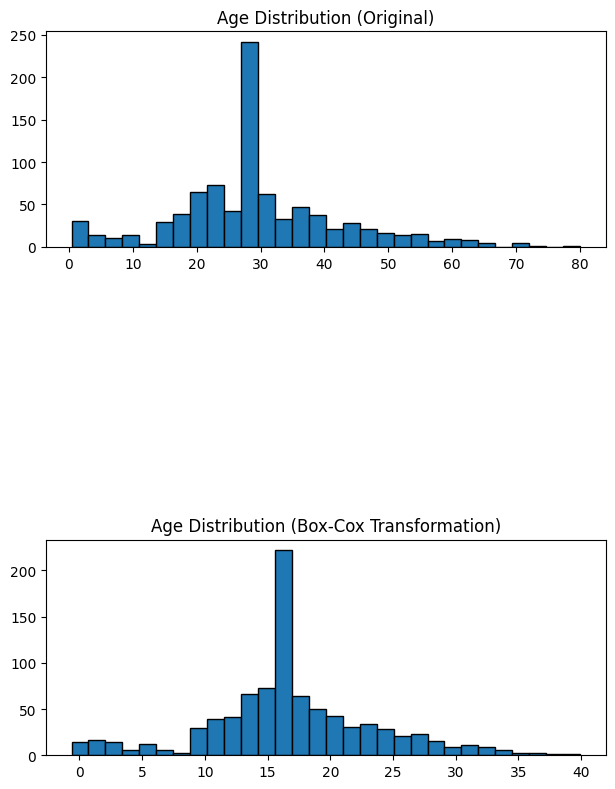

In [ ]:
import matplotlib.pyplot as plt

# 可视化变换前后的分布
plt.figure(figsize=(12, 8))

# 原始年龄分布
plt.subplot(3, 2, 1)
plt.hist(titanic_data['age'], bins=30, edgecolor='k')
plt.title('Age Distribution (Original)')

# Box-Cox 变换后的年龄分布
plt.subplot(3, 2, 5)
plt.hist(titanic_data['age_boxcox'], bins=30, edgecolor='k')
plt.title('Age Distribution (Box-Cox Transformation)')


plt.tight_layout()
plt.show()

После преобразования распределение данных становится ближе к нормальному: множество сдвинуто влево, данные более концентрированы, дисперсия уменьшена, а общее распределение более симметрично, что подходит для некоторых статистических анализов и методов моделирования, требующих высокой степени нормальности


# **кодирование категориальных признаков**

Поскольку набор данных, используемый для решения этой задачи в курсе, представляет собой набор данных Titanic, при решении этой задачи мы выбираем набор данных tips.Мы будем использовать набор данных Tips из библиотеки Seaborn, который содержит категориальные признаки, такие как пол и курение.

In [ ]:
# 加载tips数据集
tips = sns.load_dataset('tips')
# 查看数据集基本信息
print("Основная информация о наборе данных：")
print(tips.info())
print("\nПервые несколько строк набора данных：")
print(tips.head())

Основная информация о наборе данных：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None

Первые несколько строк набора данных：
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


Мы сопоставляем категорию каждого категориального признака с целым числом.

In [ ]:
# 将分类特征转换为数值类型
tips['sex'] = tips['sex'].map({'Female': 0, 'Male': 1})
tips['smoker'] = tips['smoker'].map({'No': 0, 'Yes': 1})


In [ ]:
# 使用 pandas 的 get_dummies 函数对 'sex' 和 'smoker' 列进行 One-Hot Encoding
#tips_encoded = pd.get_dummies(tips, columns=['sex', 'smoker'])

# 打印编码后的数据集
print(tips.head())

   total_bill   tip sex smoker  day    time  size
0       16.99  1.01   0      0  Sun  Dinner     2
1       10.34  1.66   1      0  Sun  Dinner     3
2       21.01  3.50   1      0  Sun  Dinner     3
3       23.68  3.31   1      0  Sun  Dinner     2
4       24.59  3.61   0      0  Sun  Dinner     4
